# AIR QUALITY ANALYSIS - INDIA

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

%matplotlib inline


In [2]:
mp.rcParams['figure.figsize'] = (20, 10)
style.use('ggplot')


In [3]:
import warnings;
warnings.filterwarnings("ignore")


# Data Analysis

## Data Exploration

In [4]:
air_quality_df = pd.read_csv('./data/data.csv')


In [5]:
number_of_rows = len(air_quality_df)
print('Number of rows in the DataFrame: {}'.format(number_of_rows))


Number of rows in the DataFrame: 435742


In [6]:
air_quality_df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [7]:
air_quality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [8]:
air_quality_df.describe()

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


## Data Cleaning

### Missing Values

#### Dropping Columns
1) If the percentage of missing values in a column is more than 50%, that particular column will be dropped 
2) The particular columns will be dropped because they won't add any value to our Air Quality Analysis
3) Considering the below data, `spm` and `pm2_5` column will be dropped

In [9]:
def show_mising_values():
    print(((air_quality_df.isnull().sum())/(number_of_rows))*100)

In [10]:
show_mising_values()

stn_code                       33.064749
sampling_date                   0.000688
state                           0.000000
location                        0.000688
agency                         34.304933
type                            1.237659
so2                             7.951035
no2                             3.725370
rspm                            9.230692
spm                            54.478797
location_monitoring_station     6.309009
pm2_5                          97.862497
date                            0.001606
dtype: float64


In [11]:
air_quality_df.drop(columns=['spm', 'pm2_5'], inplace=True)

* The column `stn_code` also has 33% of its values missing
* No statistical methods can be used to input the null values with other values
* It has also got 803 unique values. Hence, it should be removed 

In [12]:
air_quality_df['stn_code'].describe()


count     291665.0
unique       803.0
top          193.0
freq        1428.0
Name: stn_code, dtype: float64

* The column `agency` also has 34% of its values missing
* No statistical methods can be used to input the null values with other values
* It has also got 64 unique values. Hence, it should be removed 

In [13]:
air_quality_df['agency'].describe()

count                                        286261
unique                                           64
top       Maharashtra State Pollution Control Board
freq                                          27857
Name: agency, dtype: object

In [14]:
air_quality_df.drop(columns=['agency', 'stn_code'], inplace=True)

#### Replacing NaN values with statistical values

In [15]:
for i in ['so2', 'no2', 'rspm']:
    air_quality_df[i].fillna((air_quality_df[i].mean()), inplace=True)

In [16]:
show_mising_values()

sampling_date                  0.000688
state                          0.000000
location                       0.000688
type                           1.237659
so2                            0.000000
no2                            0.000000
rspm                           0.000000
location_monitoring_station    6.309009
date                           0.001606
dtype: float64


#### Removing Rows consisting of string objects

In [17]:
air_quality_df.dropna(axis=0, how='any', inplace=True)

In [18]:
show_mising_values()

sampling_date                  0.0
state                          0.0
location                       0.0
type                           0.0
so2                            0.0
no2                            0.0
rspm                           0.0
location_monitoring_station    0.0
date                           0.0
dtype: float64


## Data Visualization

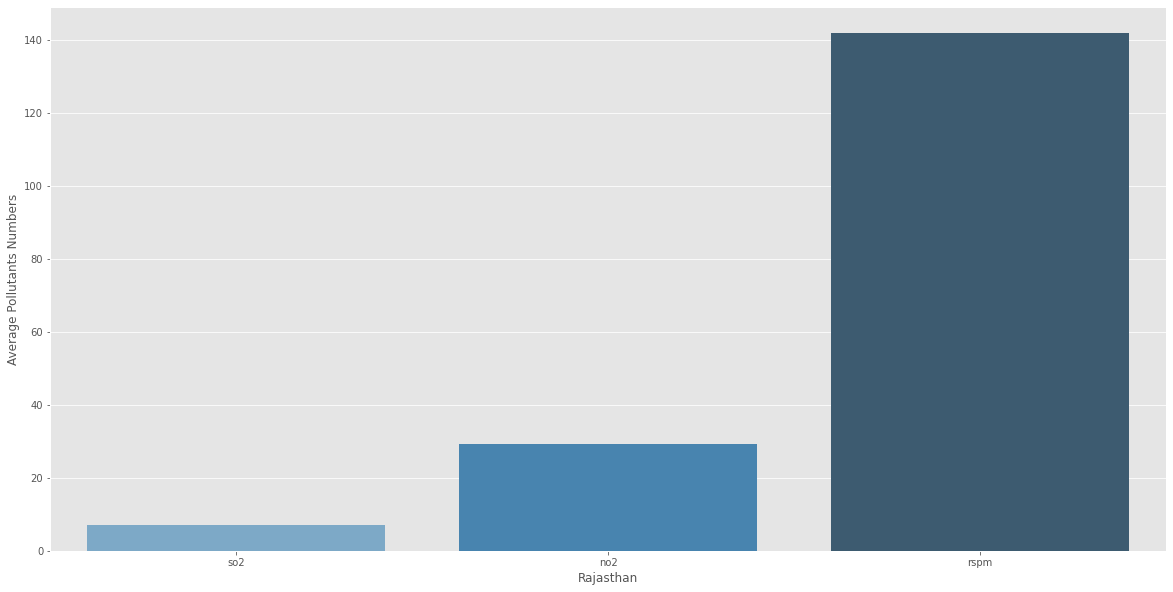

In [19]:
state = 'Rajasthan'
xticks_attributes = ['so2', 'no2', 'rspm']
bar_plot_pivot = air_quality_df.loc[(air_quality_df['state'] == state), ['state', 'so2', 'no2', 'rspm']].groupby(by='state').mean()
pollutants_numbers = bar_plot_pivot.loc[state].tolist()
sns.barplot(x=xticks_attributes, y=pollutants_numbers, palette="Blues_d")
plt.xlabel(state)
plt.ylabel('Average Pollutants Numbers')
plt.show();



In [20]:
air_quality_df['sampling_date'] = pd.to_datetime(air_quality_df['sampling_date'])
air_quality_df['date'] = pd.to_datetime(air_quality_df['date'])


In [21]:
from datetime import datetime
required_df = air_quality_df.loc[(air_quality_df['sampling_date'] > datetime(2005, 1, 1, 0 , 0, 0)) & (air_quality_df['sampling_date'] < datetime(2005, 12, 31,  0, 0, 0))]


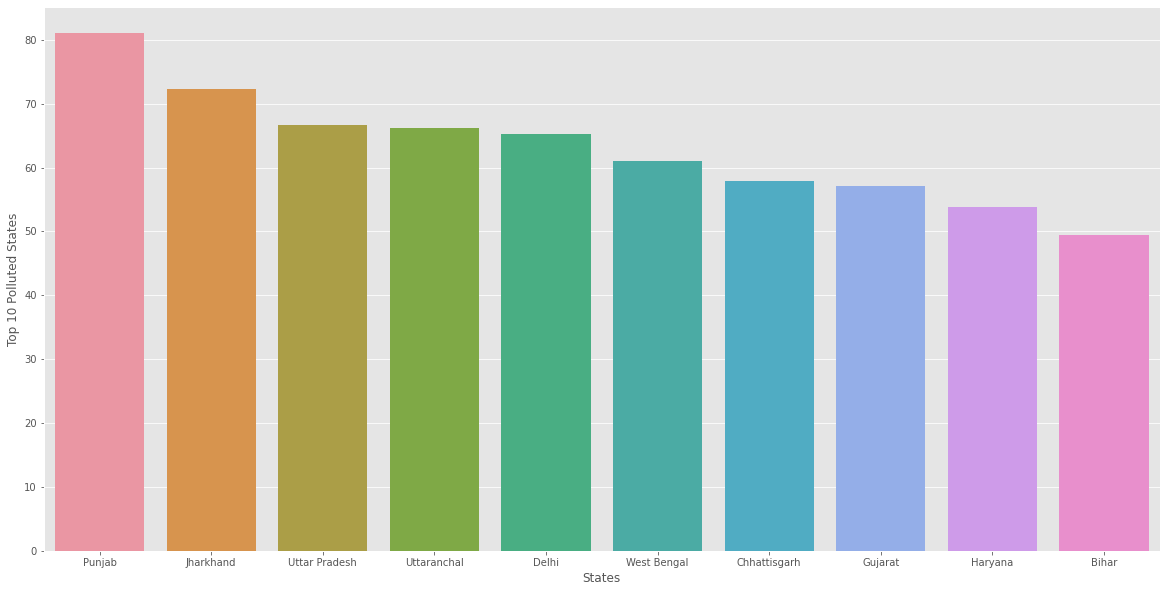

In [22]:
df = required_df.groupby('state')[['so2', 'no2', 'rspm']].mean()
df['Sum'] = df.mean(axis=1)
df.drop(columns=['so2', 'no2', 'rspm'], inplace=True)
df = df.sort_values(by=['Sum'], ascending=False)
df = df.iloc[0:10, :]
y_values = df['Sum'].tolist()
x_values = df.index.tolist()
sns.barplot(x=x_values, y=y_values)
plt.xlabel('States')
plt.ylabel('Top 10 Polluted States')
plt.show()


In [23]:
from datetime import datetime
required_df = air_quality_df.loc[(air_quality_df['sampling_date'] > datetime(
    2015, 1, 1, 0, 0, 0)) & (air_quality_df['sampling_date'] < datetime(2015,
                                                                        12, 31,  0, 0, 0))]


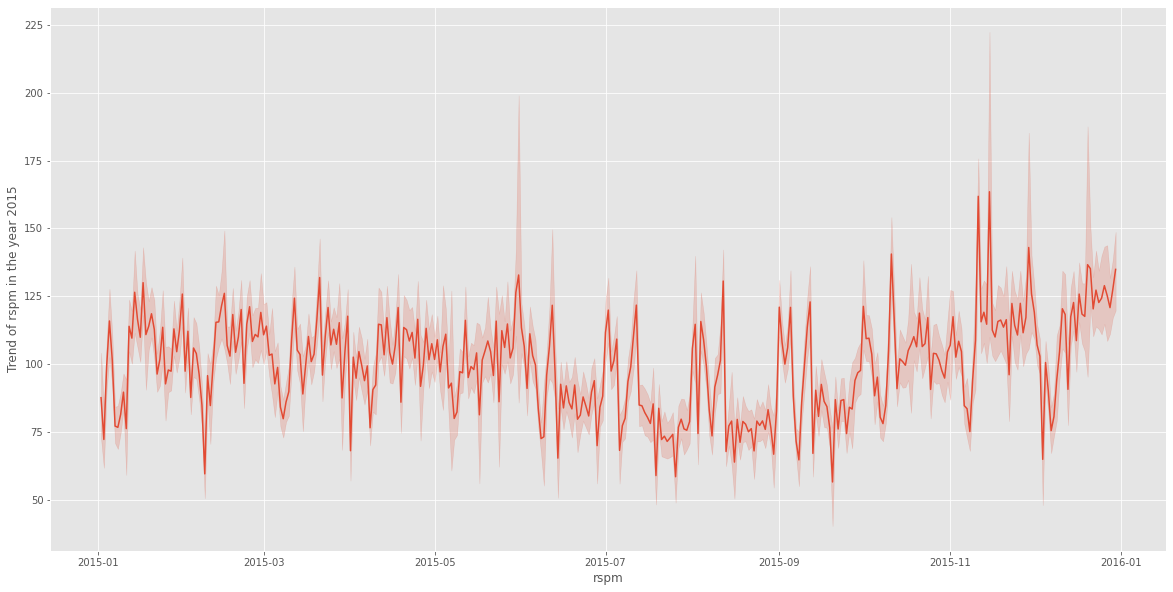

In [24]:
required_pollutant = 'rspm'
y_values = required_df.loc[:, required_pollutant].values.tolist()
x_values = required_df.sampling_date
sns.lineplot(x=x_values, y=y_values, markers=True)
plt.xlabel(required_pollutant)
plt.ylabel('Trend of {} in the year 2015'.format(required_pollutant))
plt.show()


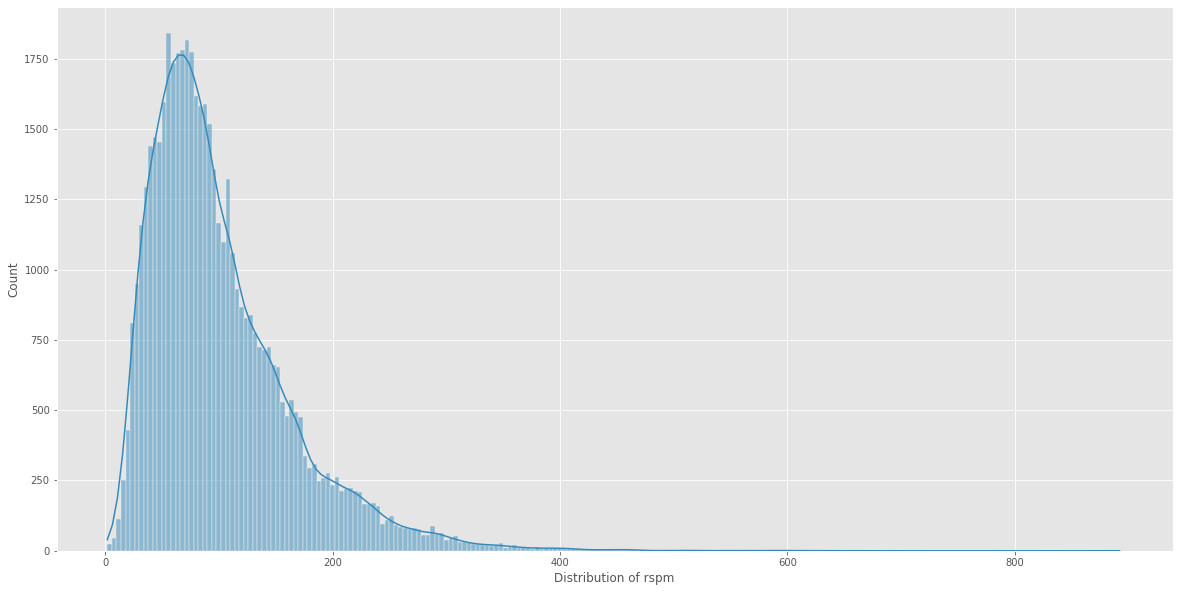

In [25]:
sns.histplot(data=required_df, x=required_pollutant, bins=30, binwidth=4, kde=True)
plt.xlabel('Distribution of {}'.format(required_pollutant))
plt.ylabel('Count')
plt.show()


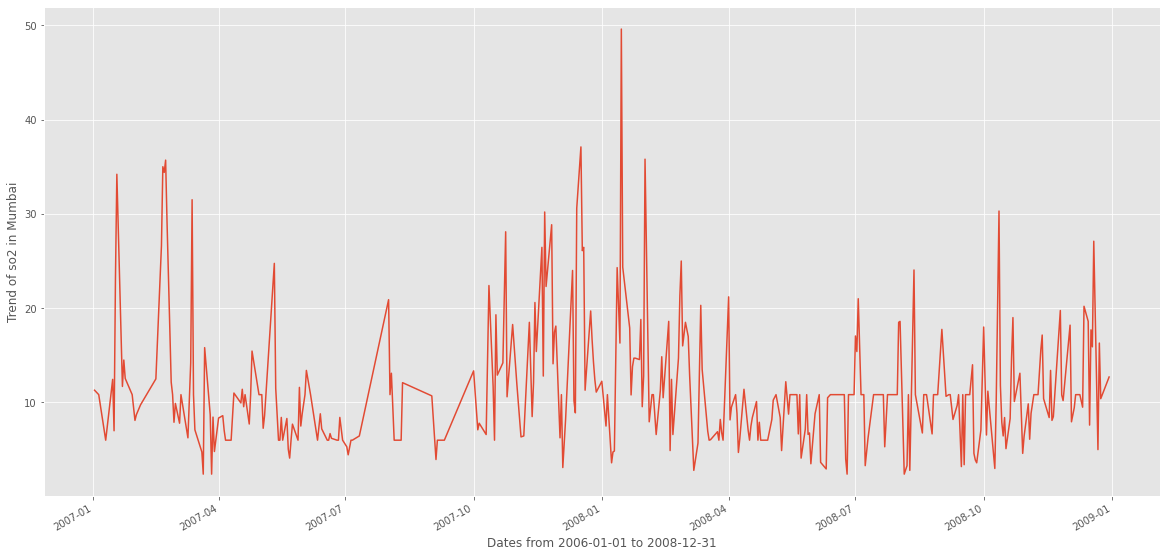

In [26]:
df = air_quality_df.set_index('date')
location = 'Mumbai'
feature = 'so2'
from_date = '2006-01-01'
to_date = '2008-12-31'
df[df['location'] == location].groupby('date')[feature].mean()[
    from_date:to_date].plot()
plt.xlabel('Dates from {} to {}'.format(from_date, to_date))
plt.ylabel('Trend of {} in {}'.format(feature, location))
plt.show()


In [63]:
air_quality_df.type.value_counts()
air_quality_df['type'] = air_quality_df['type'].replace(
    ['Residential, Rural and other Areas', 'Residential and others', 'Industrial Areas', 'Sensitive Areas'], 
                        ['Residential and Rural Areas', 'Residential Areas', 'Industrial Area', 'Sensitive Area '])


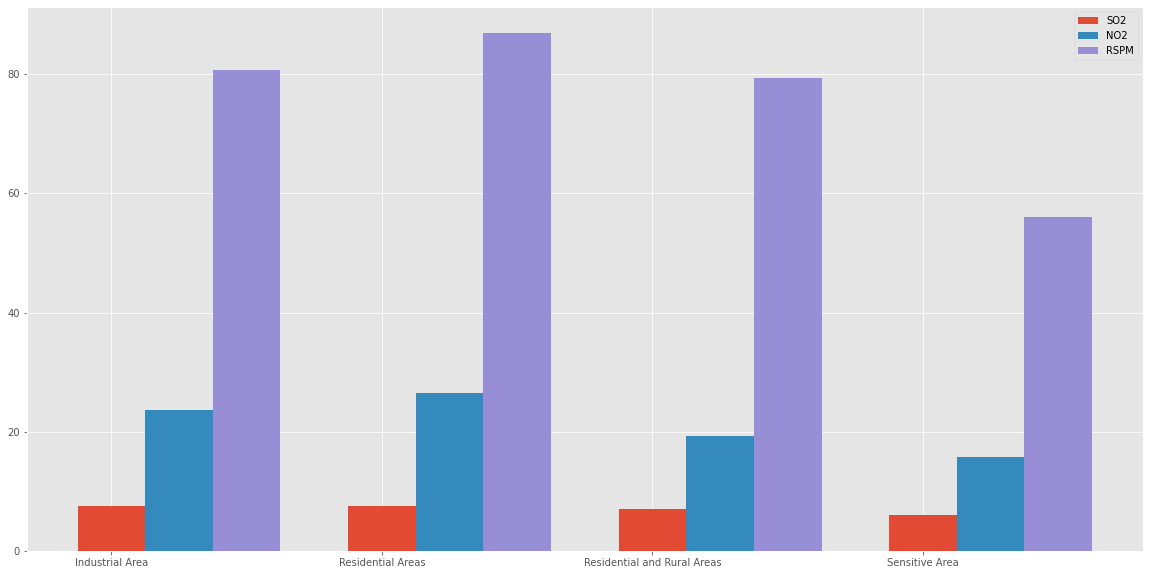

In [81]:
state = 'Andhra Pradesh'
features = ['type', 'so2', 'no2', 'rspm']
required_df = air_quality_df.loc[air_quality_df['state'] == state, features].groupby('type').mean()

fig, ax = plt.subplots()

x_columns = required_df.index.tolist()
columns_ = np.arange(len(x_columns))

ax.bar(x=columns_, height=required_df['so2'], label='SO2', width=0.25)
ax.bar(x=columns_+0.25, height=required_df['no2'], label='NO2', width=0.25)
ax.bar(x=columns_+0.50, height=required_df['rspm'], label='RSPM', width=0.25)

ax.set_xticks(columns_)
ax.set_xticklabels(x_columns)
ax.legend()
plt.show()
